In [125]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy 
import pandas as pd
from sklearn.model_selection import train_test_split

In [126]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<0.4):
            print('\nLoss is low so cancelling training!')
            self.model.stop_training = True
callbacks = myCallback()

In [127]:
mnist = pd.read_csv('fashion-mnist_train.csv')

In [128]:
x = mnist.iloc[0:,1:]
y = mnist['label']

In [129]:
x = numpy.array(x)
y = numpy.array(y)

In [130]:
y = y.reshape(y.shape[0],1)

In [131]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [132]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 784)
(18000, 784)
(42000, 1)
(18000, 1)


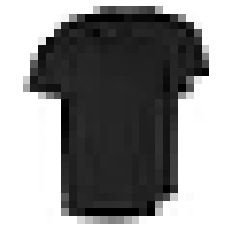

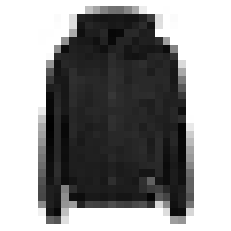

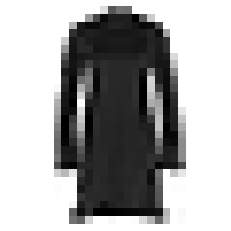

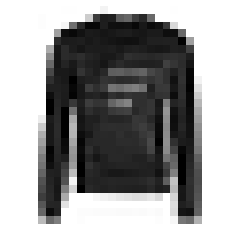

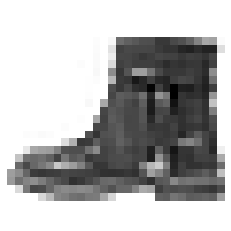

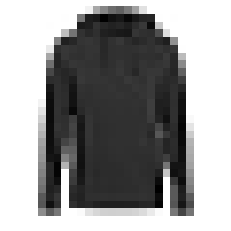

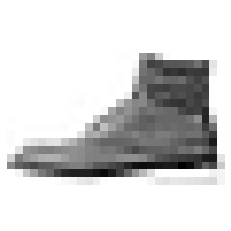

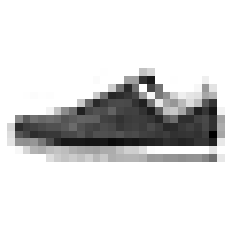

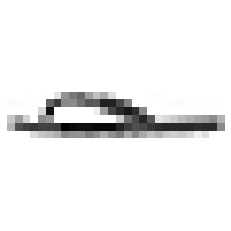

<Figure size 432x288 with 0 Axes>

In [133]:
import matplotlib
for i in range(0,10):  
    data_digit=x_train[i]
    data_digit_image=data_digit.reshape(28,28)
    plt.imshow(data_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
    plt.axis('off')
    plt.figure(i+1)
plt.show()

    

In [134]:
x_train = x_train/255.0
x_test = x_test/255.0

In [135]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ]
)

In [136]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy')

In [137]:
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])

Epoch 1/10
1313/1313 [==============================] - 7s 3ms/step - loss: 0.5465
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4043
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3629

Loss is low so cancelling training!


In [138]:
model.evaluate(x_test,y_test)

563/563 [==============================] - 214s 377ms/step - loss: 0.3670


0.3669748902320862